In [1]:
# importing all useful functions 
import math
import matplotlib.pyplot as plt
import numpy as np
from time import sleep
import gymnasium as gym
from gymnasium import Env, spaces, register, make
import random
import copy

In [2]:
class RandomWalk(Env):
    
    
    #----- 1 -----
    #constructor for initialization and some helper functions
    
    
    def __init__(self , start=3):
        
        #P is basically State: Action: [ Transition Probability , Next state , Reward , isTerminated?]
        self.P = {
            0: {
                0: [(1.0, 0, 0.0, True)],
                1: [(1.0, 0, 0.0, True)]
            },
            1: {
                0: [(0.5, 0, 0.0, True), (0.5, 2, 0.0, False)],
                1: [(0.5, 2, 0.0, False), (0.5, 0, 0.0, True)]
            },
            2: {
                0: [(0.5, 1, 0.0, False), (0.5, 3, 0.0, False)],
                1: [(0.5, 3, 0.0, False), (0.5, 1, 0.0, False)]
            },
            3: {
                0: [(0.5, 2, 0.0, False), (0.5, 4, 0.0, False)],
                1: [(0.5, 4, 0.0, False), (0.5, 2, 0.0, False)]
            },
            4: {
                0: [(0.5, 3, 0.0, False), (0.5, 5, 0.0, False)],
                1: [(0.5, 5, 0.0, False), (0.5, 3, 0.0, False)]
            },
            5: {
                0: [(0.5, 6, 1.0, True), (0.5, 4, 0.0, False)],
                1: [(0.5, 4, 0.0, False),(0.5, 6, 1.0, True)]
            },
            6: {
                0: [(1.0, 6, 0.0, True)],
                1: [(1.0, 6, 0.0, True)]
            }
        }
        
        self.size = 7 # The size of the 1D grid
        #self.window_size = 512  # The size of the PyGame window
        
        # We have 3 observations, corresponding to each position in the 1-D grid
        self.observation_space = spaces.Discrete(self.size)

        # We have 2 actions, corresponding to "left" & "right"
        self.action_space = spaces.Discrete(2)
        self.act_space_size = 2 
        self.starting_pos = start
        
    
    #return the locations of agent and target
    def _get_obs(self):
        return {   
            "agent" : self._agent_location, 
            "target": self._target_location  
        }
    
    #returns the distance between agent and target 
    def _get_info(self):
        return {  
            "distance": abs(self._agent_location - self._target_location)   
        }
    
    
    
    
    #----- 2 ------
    # The reset function to initiate 
    
    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        
        self._agent_location = self.starting_pos  #location of agent in the begining
        self._target_location = self.size-1  #starting location of target in this case 2 
        self._dead_state = 0                 #dead location
        
        
        observation = self._get_obs()        #getting useful information
        info = self._get_info()

        return observation,info
    
    
    
    
    
    #------- 3 ---------
    # The step function 
    
    def step(self, action):  # takes action as a parameter

        # gets the current location and stores the values from P set 
        prev_location = self._agent_location                                #gets location
        transitions = self.P[prev_location][action]                         #gets the corresponding action tuple
        probabilities, next_states, rewards, terminals = zip(*transitions)  #stores the value for use 
        
        # Randomly select a transition based on the probabilities
        # gives you random state based on your probabilities 
        index = random.choices(range(len(probabilities)), weights=probabilities, k=1)[0]
        # stores the values 
        self._agent_location, reward, terminated = next_states[index], rewards[index], terminals[index]
        
        truncated = False
        observation = self._get_obs()  
        info = self._get_info()

        info["log"] = {"current_state": prev_location, 
                       "action":action,  
                        "next_state": self._agent_location}

        # Return the required 5-tuple
        return observation, reward, terminated, truncated, info
    

In [3]:
# Register the custom environment
register(id='RandomWalk', entry_point=RandomWalk)

In [4]:
# Create and use the environment
environment = make('RandomWalk' )
terminated = False
reward_sum = 0
observation = environment.reset(seed=0)
while not terminated :
    action = 1  # this is where you would insert your policy
    observation, reward, terminated, truncated, info = environment.step(action)
    reward_sum += reward
    print(info['log'])

    if terminated:
        print("Terminated", "\n")

    
    if terminated or truncated:
        observation = environment.reset(seed=0)
        
        
print(" Reward = " , (reward_sum )) 

{'current_state': 3, 'action': 1, 'next_state': 4}
{'current_state': 4, 'action': 1, 'next_state': 5}
{'current_state': 5, 'action': 1, 'next_state': 4}
{'current_state': 4, 'action': 1, 'next_state': 3}
{'current_state': 3, 'action': 1, 'next_state': 4}
{'current_state': 4, 'action': 1, 'next_state': 5}
{'current_state': 5, 'action': 1, 'next_state': 6}
Terminated 

 Reward =  1.0


/Users/kislayadityaoj/opt/anaconda3/lib/python3.9/site-packages/gymnasium/utils/passive_env_checker.py:127: UserWarning: WARN: The obs returned by the `reset()` method should be an int or np.int64, actual type: <class 'dict'>
  logger.warn(f"{pre} should be an int or np.int64, actual type: {type(obs)}")
/Users/kislayadityaoj/opt/anaconda3/lib/python3.9/site-packages/gymnasium/utils/passive_env_checker.py:159: UserWarning: WARN: The obs returned by the `reset()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")
/Users/kislayadityaoj/opt/anaconda3/lib/python3.9/site-packages/gymnasium/utils/passive_env_checker.py:127: UserWarning: WARN: The obs returned by the `step()` method should be an int or np.int64, actual type: <class 'dict'>
  logger.warn(f"{pre} should be an int or np.int64, actual type: {type(obs)}")
/Users/kislayadityaoj/opt/anaconda3/lib/python3.9/site-packages/gymnasium/utils/passive_env_checker.py:159: UserWarning: WARN

In [5]:
environment = make('RandomWalk')
observation = environment.reset(seed=0)


policy=0                #only for this particular case as anyways it will go left 


def generateTrajectory( Env , policy , maxSteps) :
    experience = []
    terminated = False
    steps=1
    while not terminated :
        
        action = policy
        observation, reward, terminated, truncated, info = environment.step(action)
        
        experience.append( (info['log']['current_state'],info['log']['action'],reward,info['log']['next_state']) )
        
        if terminated or truncated:
            observation = environment.reset(seed=0)
            return experience
            
        if steps > maxSteps :
            observation = environment.reset(seed=0)
            return []
        
        steps+=1

generateTrajectory(environment , policy , 100) 


[(3, 0, 0.0, 4), (4, 0, 0.0, 5), (5, 0, 1.0, 6)]

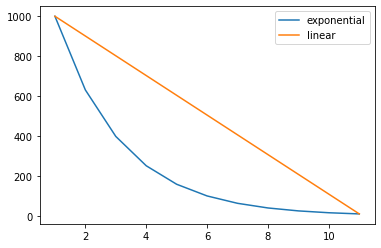

In [6]:

# decay-type : 0 -> linear decay , 1 -> exponential decay

def decayAlpha(initialValue, finalValue, maxSteps, decayType) :
    ans=[initialValue]
    if decayType == 0 :
        
        steps= abs(finalValue-initialValue)/maxSteps 
        i = 1 
        value = initialValue
        while i <= maxSteps :
            value = value - steps
            ans.append(value)
            i+=1
        return ans
    
    else :
        
        factor =  (finalValue / initialValue) ** (1 / maxSteps) 
        i=1
        
        while i <= maxSteps :
            value = initialValue * (factor ** i)
            ans.append(value)
            i+=1
        
        return ans 
        
y_axis1 = decayAlpha(1000, 10, 10, 1)
y_axis2 = decayAlpha(1000, 10, 10, 0) 

x_axis = [i for i in range(1,12)]


plt.plot(x_axis, y_axis1 , label='exponential')
plt.plot(x_axis, y_axis2 , label='linear'      )

plt.legend()

#plt.savefig("qn22.png", format="png", dpi=1200)
plt.show()


In [7]:
def MonteCarloPrediction( Env , maxSteps , noEpisodes ,alph=0.01 ,policy=0 , gamma=0.99,   firstVisit=True):
    # initializations
    v = np.zeros(Env.size)
    visited=np.zeros(Env.size)
    v_r = np.zeros((noEpisodes,Env.size))
    G_t = np.zeros(noEpisodes)
    observation = Env.reset(seed=0)
    
    alpha= decayAlpha(alph, 0.001, noEpisodes , 0)
    #algorithm
    for e in range(noEpisodes):
        observation = Env.reset(seed=0)
        value=0
        t = generateTrajectory( Env , policy , maxSteps)
        
        visited[:]=False
        
        for i , (s,action,reward,nex) in enumerate(t):
            if visited[s] and firstVisit :
                continue
            else :
                visited[s]=True
            
            G=0
            j=i
            while j<len(t):
                G += ((gamma**(j-i))*(t[j][2]))
                j+=1
            
            if s==5:
                value=G
            
            v[s]+= alpha[e]*(G-v[s]) 
        G_t[e]=value
        v_r[e]=v
        
    return v_r


environment = make('RandomWalk' )
observation = environment.reset(seed=0)
MonteCarloPrediction( environment, 100,10)

/Users/kislayadityaoj/opt/anaconda3/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.size to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.size` for environment variables or `env.get_wrapper_attr('size')` that will search the reminding wrappers.
  logger.warn(


array([[0.        , 0.        , 0.        , 0.009801  , 0.0099    ,
        0.01      , 0.        ],
       [0.        , 0.        , 0.00848179, 0.01794169, 0.01812292,
        0.019009  , 0.        ],
       [0.        , 0.        , 0.00848179, 0.02583139, 0.02609231,
        0.02705313, 0.        ],
       [0.        , 0.00647061, 0.01482578, 0.03198466, 0.03257051,
        0.03415564, 0.        ],
       [0.        , 0.01210206, 0.01991315, 0.0369104 , 0.03764954,
        0.03938637, 0.        ],
       [0.        , 0.01210206, 0.02492999, 0.04178248, 0.04267291,
        0.04445303, 0.        ],
       [0.        , 0.01204639, 0.02481531, 0.04159028, 0.04267291,
        0.04445303, 0.        ],
       [0.        , 0.01200182, 0.0247235 , 0.0414364 , 0.04267291,
        0.04445303, 0.        ],
       [0.        , 0.01196821, 0.02465427, 0.04132038, 0.04255343,
        0.04432856, 0.        ],
       [0.        , 0.01194548, 0.02460743, 0.04124187, 0.04255343,
        0.04432856, 0. 

In [13]:
def TemporalDifference( Env , noEpisodes ,alpha ,policy=0 , gamma=0.99):
    # initializations
    v = np.zeros(Env.size)
    v_r = np.zeros((noEpisodes,Env.size))
    observation = Env.reset(seed=0)
    G_t = np.zeros(noEpisodes)
    alpha= decayAlpha(alpha, 0.001, noEpisodes , 1)
    
    
    #algorithm
    for e in range(noEpisodes):
        terminated = False 
        value=0
        
        while not terminated :
            action = policy
            observation, reward, terminated, truncated, info = environment.step(action)
            td_target = reward
            if not terminated :
                td_target += gamma * v[info['log']['next_state']]
                
            td_error=td_target-v[info['log']['current_state']] 
            if info['log']['current_state'] == 5 :
                value=td_error
            
            v[info['log']['current_state']]+=(alpha[e]*td_error)
            info['log']['current_state']=info['log']['next_state']
            
        G_t[e]=value
        v_r[e]=v
        observation = Env.reset(seed=0)
    return G_t


environment = make('RandomWalk' , start=4)
observation = environment.reset(seed=0)
TemporalDifference( environment , 10 , 0.01)

/Users/kislayadityaoj/opt/anaconda3/lib/python3.9/site-packages/gymnasium/utils/passive_env_checker.py:127: UserWarning: WARN: The obs returned by the `reset()` method should be an int or np.int64, actual type: <class 'dict'>
  logger.warn(f"{pre} should be an int or np.int64, actual type: {type(obs)}")
/Users/kislayadityaoj/opt/anaconda3/lib/python3.9/site-packages/gymnasium/utils/passive_env_checker.py:159: UserWarning: WARN: The obs returned by the `reset()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")
/Users/kislayadityaoj/opt/anaconda3/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.size to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.size` for environment variables or `env.get_wrapper_attr('size')` that will search the reminding wrappers.
  logger.warn(
/Users/kislayadityaoj/opt/anaconda3/lib/python3.9/site-packages/g

array([ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  0.99501795, -0.00691797,  0.99306094])

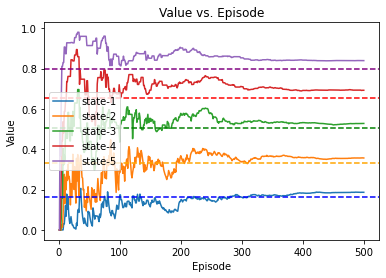

In [9]:
# question 2 - TD

environment = make('RandomWalk' , start=2)
observation = environment.reset(seed=0)
arr = TemporalDifference( environment , 500 , 0.5)

y_axis1=arr[:,1]
y_axis2=arr[:,2]
y_axis3=arr[:,3]
y_axis4=arr[:,4]
y_axis5=arr[:,5]

x_axis = np.linspace(1,500,500)    

# Plot the data
plt.plot(x_axis, y_axis1, label='state-1')
plt.plot(x_axis, y_axis2, label='state-2')
plt.plot(x_axis, y_axis3, label='state-3')
plt.plot(x_axis, y_axis4, label='state-4')
plt.plot(x_axis, y_axis5, label='state-5')

# Add labels and legend
plt.title('Value vs. Episode')
plt.xlabel('Episode')
plt.ylabel('Value')
plt.legend()

plt.axhline(y = 0.16154172, color = 'blue', linestyle = 'dashed')
plt.axhline(y = 0.33186436, color = 'orange', linestyle = 'dashed')
plt.axhline(y = 0.504596, color = 'green', linestyle = 'dashed')
plt.axhline(y = 0.65570089, color = 'red', linestyle = 'dashed')
plt.axhline(y = 0.79724225, color = 'purple', linestyle = 'dashed')
#plt.xscale('log')

#plt.savefig("qn29.png", format="png", dpi=1200)

# Show the plot
plt.show()

/Users/kislayadityaoj/opt/anaconda3/lib/python3.9/site-packages/gymnasium/utils/passive_env_checker.py:127: UserWarning: WARN: The obs returned by the `reset()` method should be an int or np.int64, actual type: <class 'dict'>
  logger.warn(f"{pre} should be an int or np.int64, actual type: {type(obs)}")
/Users/kislayadityaoj/opt/anaconda3/lib/python3.9/site-packages/gymnasium/utils/passive_env_checker.py:159: UserWarning: WARN: The obs returned by the `reset()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")
/Users/kislayadityaoj/opt/anaconda3/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.size to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.size` for environment variables or `env.get_wrapper_attr('size')` that will search the reminding wrappers.
  logger.warn(
/Users/kislayadityaoj/opt/anaconda3/lib/python3.9/site-packages/g

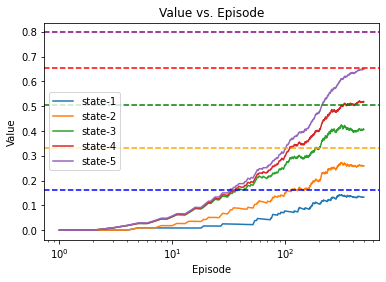

In [10]:
# question 2 - MC

environment = make('RandomWalk' )
observation = environment.reset(seed=0)
arr = MonteCarloPrediction( environment, 100,500,firstVisit=True)

y_axis1=arr[:,1]
y_axis2=arr[:,2]
y_axis3=arr[:,3]
y_axis4=arr[:,4]
y_axis5=arr[:,5]

x_axis = np.linspace(1,500,500)    

# Plot the data
plt.plot(x_axis, y_axis1, label='state-1')
plt.plot(x_axis, y_axis2, label='state-2')
plt.plot(x_axis, y_axis3, label='state-3')
plt.plot(x_axis, y_axis4, label='state-4')
plt.plot(x_axis, y_axis5, label='state-5')

# Add labels and legend
plt.title('Value vs. Episode')
plt.xlabel('Episode')
plt.ylabel('Value')
plt.legend()

plt.axhline(y = 0.16154172, color = 'blue', linestyle = 'dashed')
plt.axhline(y = 0.33186436, color = 'orange', linestyle = 'dashed')
plt.axhline(y = 0.504596, color = 'green', linestyle = 'dashed')
plt.axhline(y = 0.65570089, color = 'red', linestyle = 'dashed')
plt.axhline(y = 0.79724225, color = 'purple', linestyle = 'dashed')
#plt.xscale('log')

#plt.savefig("qn281.png", format="png", dpi=1200)

# Show the plot
plt.show()

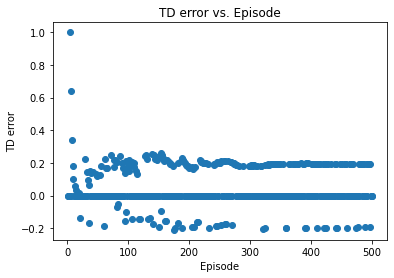

In [15]:
environment = make('RandomWalk' , start=2)
observation = environment.reset(seed=0)
arr = TemporalDifference( environment , 500 , 0.5)

y_axis=arr


x_axis = np.linspace(1,500,500)    

# Plot the data
plt.scatter(x_axis, y_axis, label='state')

# Add labels and legend
plt.title('TD error vs. Episode')
plt.xlabel('Episode')
plt.ylabel('TD error')

#plt.xscale('log')

#plt.savefig("qn2155.png", format="png", dpi=1200)

# Show the plot
plt.show()

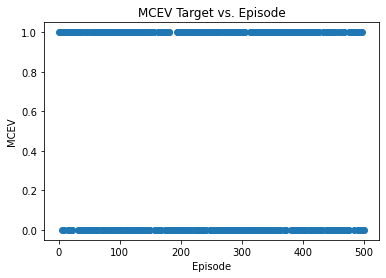

In [116]:
environment = make('RandomWalk' )
observation = environment.reset(seed=0)
arr = MonteCarloPrediction( environment, 100,500,firstVisit=False)

y_axis=arr


x_axis = np.linspace(1,500,500)    

# Plot the data
plt.scatter(x_axis, y_axis, label='state')


# Add labels and legend
plt.title('MCEV Target vs. Episode')
plt.xlabel('Episode')
plt.ylabel('MCEV')


#plt.xscale('log')

#plt.savefig("qn214.png", format="png", dpi=1200)

# Show the plot
plt.show()

/Users/kislayadityaoj/opt/anaconda3/lib/python3.9/site-packages/gymnasium/utils/passive_env_checker.py:127: UserWarning: WARN: The obs returned by the `reset()` method should be an int or np.int64, actual type: <class 'dict'>
  logger.warn(f"{pre} should be an int or np.int64, actual type: {type(obs)}")
/Users/kislayadityaoj/opt/anaconda3/lib/python3.9/site-packages/gymnasium/utils/passive_env_checker.py:159: UserWarning: WARN: The obs returned by the `reset()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")
/Users/kislayadityaoj/opt/anaconda3/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.size to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.size` for environment variables or `env.get_wrapper_attr('size')` that will search the reminding wrappers.
  logger.warn(
/Users/kislayadityaoj/opt/anaconda3/lib/python3.9/site-packages/g

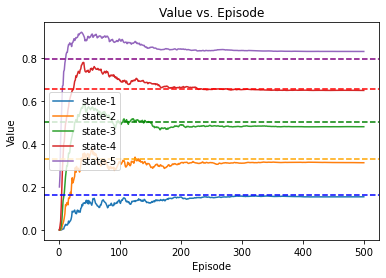

In [129]:
# question 2 - TD


arr = np.zeros((500,7))
              
for i in range(20): 
    environment = make('RandomWalk' , start=2)
    observation = environment.reset(seed=i)
    arr = arr + TemporalDifference( environment , 500 , 0.5)
arr = arr/20
y_axis1=arr[:,1]
y_axis2=arr[:,2]
y_axis3=arr[:,3]
y_axis4=arr[:,4]
y_axis5=arr[:,5]

x_axis = np.linspace(1,500,500)    

# Plot the data
plt.plot(x_axis, y_axis1, label='state-1')
plt.plot(x_axis, y_axis2, label='state-2')
plt.plot(x_axis, y_axis3, label='state-3')
plt.plot(x_axis, y_axis4, label='state-4')
plt.plot(x_axis, y_axis5, label='state-5')

# Add labels and legend
plt.title('Value vs. Episode')
plt.xlabel('Episode')
plt.ylabel('Value')
plt.legend()

plt.axhline(y = 0.16154172, color = 'blue', linestyle = 'dashed')
plt.axhline(y = 0.33186436, color = 'orange', linestyle = 'dashed')
plt.axhline(y = 0.504596, color = 'green', linestyle = 'dashed')
plt.axhline(y = 0.65570089, color = 'red', linestyle = 'dashed')
plt.axhline(y = 0.79724225, color = 'purple', linestyle = 'dashed')
#plt.xscale('log')

plt.savefig("qn283.png", format="png", dpi=1200)

# Show the plot
plt.show()

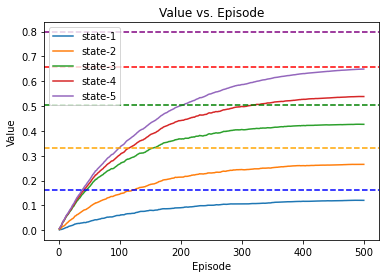

In [12]:
arr = np.zeros((500,7))
              
for i in range(20): 
    environment = make('RandomWalk' )
    observation = environment.reset(seed=i)
    arr += MonteCarloPrediction( environment, 100,500,firstVisit=True)
arr = arr/20

y_axis1=arr[:,1]
y_axis2=arr[:,2]
y_axis3=arr[:,3]
y_axis4=arr[:,4]
y_axis5=arr[:,5]

x_axis = np.linspace(1,500,500)    

# Plot the data
plt.plot(x_axis, y_axis1, label='state-1')
plt.plot(x_axis, y_axis2, label='state-2')
plt.plot(x_axis, y_axis3, label='state-3')
plt.plot(x_axis, y_axis4, label='state-4')
plt.plot(x_axis, y_axis5, label='state-5')

# Add labels and legend
plt.title('Value vs. Episode')
plt.xlabel('Episode')
plt.ylabel('Value')
plt.legend()

plt.axhline(y = 0.16154172, color = 'blue', linestyle = 'dashed')
plt.axhline(y = 0.33186436, color = 'orange', linestyle = 'dashed')
plt.axhline(y = 0.504596, color = 'green', linestyle = 'dashed')
plt.axhline(y = 0.65570089, color = 'red', linestyle = 'dashed')
plt.axhline(y = 0.79724225, color = 'purple', linestyle = 'dashed')
#plt.xscale('log')

#plt.savefig("qn281.png", format="png", dpi=1200)

# Show the plot
plt.show()
